In [69]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt

# Example: Coin Flip
### I flip a coin 13 times.
### I want to find the prob distribution of the fairness of the coin.
### Specifically what is p, the probability of getting heads

In [70]:
# Heads = 1; Tails=0
flips = np.array([1,0,0,0,1,0,1,0,1,0,0,0,0])
n_heads = sum(flips)
n_flips = len(flips)

# I'll be using beta(1,1) basically a Unif(0,1) distribution for the prior
# And a Binomial pdf formula ~Bin(4, 13, p) for the Likelihood. We are trying to estimate p.
alpha_prior = 1
beta_prior = 1

### Posterior Probability Function: Prior * Likelihood 
(we don't need the denominator from Bayes' formula because they'll cancel out when we make a posterior ratio, anyway)

In [71]:
def posterior(proposed_p, n_heads=n_heads, n_flips=n_flips, 
              alpha_prior=alpha_prior, beta_prior=beta_prior):
    likelihood = ss.binom.pmf(n_heads, n_flips, proposed_p) 
    prior = ss.beta.pdf(proposed_p, alpha_prior, beta_prior)
    return prior*likelihood

In [72]:
#Set the Seed and Guess a proposal_0

np.random.seed(42)
samples = []
current_p = 0.9
print(current_p)

0.9


# Metropolis Algo
### Acceptance Criterion: 
### Generate a random variable U~Unif(0,1)
### If U < $\frac{posterior\_proposal_{t+1}}{posterior\_proposal_{t}}$, accept the the new $proposal_{t+1}$
### Else reject it and repeat using $proposal_{t}$

In [73]:
samples = []
for i in range(10000):
    proposed_p = np.random.normal(current_p, 0.1)

    accept_prob = posterior(proposed_p)/posterior(current_p)

    if np.random.rand() < accept_prob:
        current_p = proposed_p
    
    samples.append(current_p)

Text(0.5, 0.98, 'Visualize Accepted Proposals to See Burn-In')

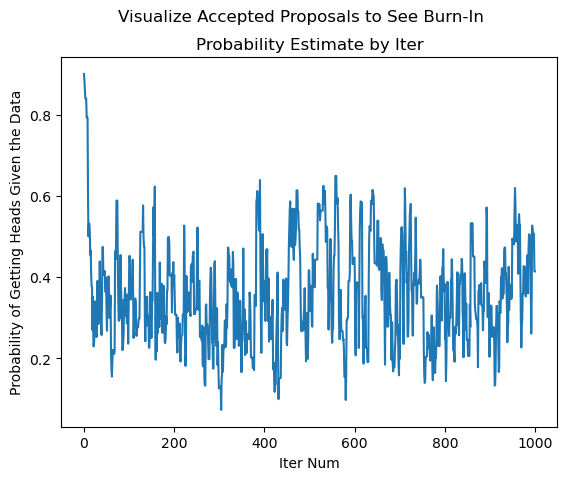

In [76]:

num_samples = len(samples)
samples2 = samples[:1000]
num_samples2 = len(samples2)

# fig,ax = plt.subplot()
plt.plot(list(range(num_samples2)), samples2)
plt.title("Probability Estimate by Iter")
plt.xlabel("Iter Num")
plt.ylabel("Probability of Getting Heads Given the Data")
plt.suptitle("Visualize Accepted Proposals to See Burn-In")


Text(0.5, 0.98, 'Hist of Ps for Metropolis')

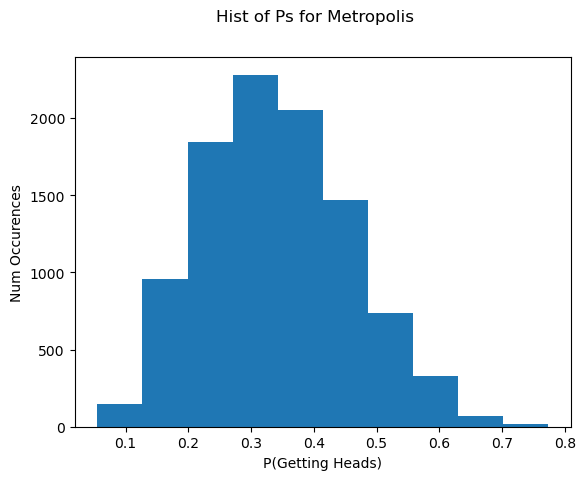

In [80]:
plt.hist(samples[100:])
plt.xlabel("P(Getting Heads)")
plt.ylabel("Num Occurences")
plt.suptitle("Hist of Ps for Metropolis")

In [79]:
print(np.mean(samples[100:]))

0.3411226271632478


# Metropolis - Hastings algorithm
## --> introduces a bias to create an assymmetrical distribution
## --> The reasons for this are multiple (not getting caught in local maxima for example)
## --> But my reason here might be because I think I've undersampled Heads. 

In [106]:
samples= []
current_p = 0.1

#I picked these bias probabilities somewhat randomly
#Let's say, I believe my data undersampled heads because I think the coin is fair
#So I want to introduce a right-ward bias.
#But I have chosen a low starting current_p to try to counterbalance this.
 
bias_to_increase = 0.6
bias_to_decrease = 0.4

for i in range(100000):
    # Propose a new p with a simple asymmetric mechanism
    if np.random.rand() < bias_to_increase:  # 60% chance to move right
        proposed_p = current_p + np.random.normal(0.02, 0.05)  # Bias towards increasing p
        proposed_p = min(max(proposed_p,0), 1)
        proposal_ratio = bias_to_increase / bias_to_decrease  # Forward probability / Reverse probability
    else:  # 40% chance to move left
        proposed_p = current_p - np.random.normal(0.02, 0.05)  # Bias towards decreasing p
        proposed_p = min(max(proposed_p,0), 1)
        proposal_ratio = bias_to_decrease/bias_to_increase  # Adjusted for the reverse move


    # Calculate the acceptance probability including the proposal ratio
    accept_prob = posterior(proposed_p)/posterior(current_p)

    # INCLUDE THE PROPOSAL RATIO IN THE ACCEPTANCE PROBABILITY... 
    # this attempts to counterbalance the bias introduced in the beginning
    accept_prob = accept_prob * proposal_ratio
    
    if np.random.rand() < accept_prob:
        current_p = proposed_p
    
    samples.append(current_p)

Text(0.5, 0.98, 'Look at First 1000 Iters to See Burn-In')

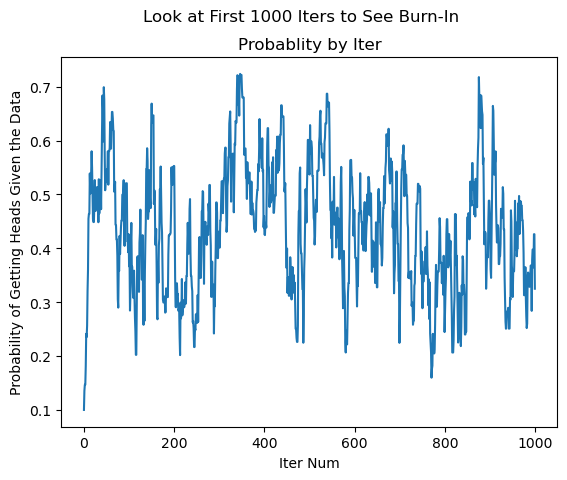

In [107]:
num_samples = len(samples)
samples2 = samples[:1000]
num_samples2 = len(samples2)

# fig,ax = plt.subplot()
plt.plot(list(range(num_samples2)), samples2)
plt.title("Probablity by Iter")
plt.xlabel("Iter Num")
plt.ylabel("Probability of Getting Heads Given the Data")
plt.suptitle("Look at First 1000 Iters to See Burn-In")


Text(0.5, 0.98, 'Hist of Ps for Metropolis-Hastings')

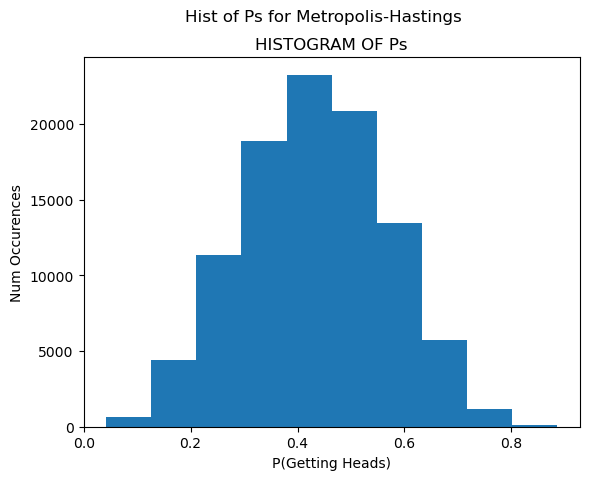

In [108]:
plt.hist(samples[250:])
plt.title("HISTOGRAM OF Ps")
plt.xlabel("P(Getting Heads)")
plt.ylabel("Num Occurences")
plt.suptitle("Hist of Ps for Metropolis-Hastings")

In [109]:
np.mean(samples[250:])


0.43238371498197037